# **2/2568 FRA501: Pattern Recognition**
## **HW1 Clustering and Regression**

**Member**
- 65340500037 Pavaris Asawakijtananont
- 65340500058 Anuwit Intet
- 65340500062 Aitthikit Kitchareonnon

Consider a supervised learning problem with $n$ training samples, feature vectors $x_i \in \mathbb{R}^d$, target values $y_i \in \mathbb{R}$, and a linear model $\hat{y}_i = x_i^\top \theta$, where $\theta \in \mathbb{R}^d$; the loss function is defined as:

$$L(\theta) = \frac{1}{n} \sum_{i=1}^{n} |x_i^\top \theta - y_i| + \lambda \|\theta\|_2^2, \quad \lambda > 0$$

### **3.1. Derive the gradient of $L(\theta)$. (5 points)**

We will divide the differentiation into two parts:

##### **1. Mean Absolute Error Term**

$$\frac{1}{n} \sum_{i=1}^{n} |x_i^\top \theta - y_i|$$

Finding the gradient of the first term can be done using the following steps:

1. Since gradients have linearity, we can directly place the $\nabla_\theta$ operator after the sum sign ($\sum$):
$$\nabla_\theta f(\theta) = \frac{1}{n} \sum_{i=1}^{n} \nabla_\theta |x_i^\top \theta - y_i|$$

2. Using the basic calculus formula $\frac{d}{du}|u| = \text{sign}(u)$ or $\frac{u}{|u|}$
Given $u = x_i^\top \theta - y_i$, we have:
$$\nabla_\theta |u| = \text{sign}(u) \cdot \nabla_\theta(u)$$

3. Differentiate the inner term $u = (x_i^\top \theta - y_i)$ with respect to the vector $\theta$:

    * $\nabla_\theta (x_i^\top \theta) = x_i$

    * $\nabla_\theta (y_i) = 0$

When all the elements are put together, the gradient of the first term is:

$$\nabla_\theta \left( \frac{1}{n} \sum_{i=1}^{n} |x_i^\top \theta - y_i| \right) = \frac{1}{n} \sum_{i=1}^{n} \text{sign}(x_i^\top \theta - y_i) \cdot x_i$$

##### **2. $L_2$ Regularization Term** 

$$\lambda \|\theta\|_2^2$$

The gradient of the second term can be found by considering the partial derivative as follows:

* From the definition $\|\theta\|_2^2 = \left( \sqrt{\theta_1^2 + \theta_2^2 + \dots + \theta_j^2 + \dots + \theta_m^2} \right)^2 = \theta_1^2 + \theta_2^2 + \dots + \theta_j^2 + \dots + \theta_m^2$
* Therefore: $\frac{\partial}{\partial \theta_j} (\lambda \sum_{i=1}^{m} \theta_i^2) = \lambda \cdot (2\theta_j) = 2\lambda\theta_j$

Since:
$$\nabla_\theta L(\theta) = \begin{bmatrix} \frac{\partial L}{\partial \theta_1} \\ \frac{\partial L}{\partial \theta_2} \\ \vdots \\ \frac{\partial L}{\partial \theta_m} \end{bmatrix}$$

When the differential results ($2\lambda\theta_1, 2\lambda\theta_2, \dots$) are arranged contiguously in a vector:
$$\begin{bmatrix} 2\lambda\theta_1 \\ 2\lambda\theta_2 \\ \vdots \\ 2\lambda\theta_m \end{bmatrix} = 2\lambda \begin{bmatrix} \theta_1 \\ \theta_2 \\ \vdots \\ \theta_m \end{bmatrix} = 2\lambda\theta$$

When formatted nicely, the gradient of the second term will be:
$$\nabla_\theta (\lambda \|\theta\|_2^2) = 2\lambda\theta$$

When parts 1 and 2 are added together according to the law of differentiation, the final solution of $\nabla_\theta L(\theta)$ is:

$$\nabla_\theta L(\theta) = \frac{1}{n} \sum_{i=1}^{n} \text{sign}(x_i^\top \theta - y_i) x_i + 2\lambda\theta$$

- n is the number of samples

Proof of Derivertive of Absolute Value: https://youtu.be/76SrD5P5V-0?si=eHcZp2XoIsbgH0jk

### **3.2. Using the result from (3.1), write the gradient descent update rule for $\theta$, assuming a learning rate $\eta$. (2 points)**

$$\theta_j = \theta_j - \eta \cdot \nabla_\theta L(\theta)$$
$$\theta_j = \theta_j - \eta \left[ \frac{1}{n} \sum_{i=1}^{n} \text{sign}(x_i^\top \theta - y_i) \cdot x_{i,j} + 2\lambda\theta_j \right]$$


### **3.3. Explain the role of the regularization term $\lambda \|\theta\|_2^2$ in the update rule. (3 points)**

- `Weight Decay:` It forces the weights to shrink towards zero at every update step (by a factor proportional to their current magnitude).

- `Preventing Overfitting:` By penalizing large weights, it prevents the model from becoming overly complex or relying too heavily on any single feature. This improves the model's ability to generalize to unseen data.

- `Numerical Stability:` It ensures the optimization problem is strictly convex (if $\lambda > 0$), making the solution unique and stable.

### **3.4. Explain how the update rule derived differs from that of Mean Squared Error (MSE) in terms of the model’s learning behavior. (5 points)**

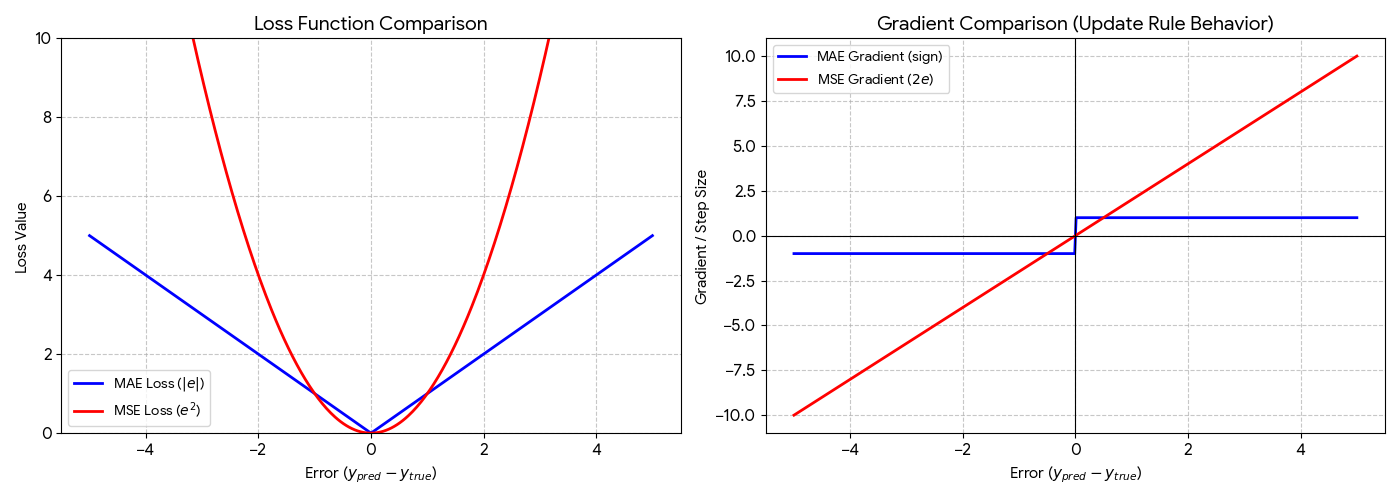

MSE Behavior (Sensitivity to Magnitude)

- The gradient of MSE ($L_{MSE} \propto (error)^2$) contains the term $(x_i^\top \theta - y_i) x_i$.

- This means the update size is proportional to the error. Large errors result in huge gradients and massive updates.

- Consequence: MSE is sensitive to outliers. A single data point with a massive error can dominate the gradient and pull the model significantly off course.

Current Model Behavior (Robustness)
- The gradient of your model ($L \propto |error|$) contains the term $\text{sign}(x_i^\top \theta - y_i) x_i$.
- This means the update size is constant (determined by $\eta$ and $x_i$) regardless of how large the error is. It only cares about the direction (positive or negative) of the error.
- Consequence: This model (MAE) is robust to outliers. An extreme outlier contributes no more to the gradient than a typical data point, preventing it from distorting the learned model.

**Summary** 
- The derived update rule applies a constant force to correct errors, making it stable against outliers but potentially harder to converge to an exact zero error (often requiring a decaying learning rate), whereas MSE applies a proportional force, converging smoothly but risking instability from outliers.